<div style="text-align:center">
<img src="img/markov.png"  width="500">
</div>

## Introduction

Wikipedia quote : 
In probability theory and statistics, a Markov chain or Markov process is a stochastic process describing a sequence of possible events in which the probability of each event depends only on the state attained in the previous event. Informally, this may be thought of as, "What happens next depends only on the state of affairs now." 

datacamp quote: 
Markov chains have prolific use in mathematics. They are widely used in economics, game theory, 
in communication theory, genetics and finance. 

They arise widely in especially Bayesian statistical and information theoretical contexts. 
When dealing with real-world problems, they are used to postulate solutions to study cruise control systems 
in motor vehicles, queues or queues of customers arriving at an airport, currency exchange rates, etc. 

The algorithm known as PageRank, which was originally proposed for the Internet search engine Google, is based on a process 
of Markov. Reddit's Subreddit Simulator is a fully automated subreddit that generates random submissions and comments 
using Markov chains, so cool!

you only need to know the current state to determine the next state


## Summary 

1. <b>Predict how many people will move from Lausanne to Geneva</b>
    - Instance
    - Python code
2. <b>Predict the weather based on current weather</b>
    - Instance
    - Python code
3. <b>Robot Arm maintenance - Factory production environment</b>
    - Instance
    - Python code
4. <b>Stocks market transitions</b>
    - Instance
    - Python code



# 1. Predict how many people will move from Lausanne to Geneva  :

On veut avoir des prévisions des déménagements, en fonction du nombre d'états dans le temps .
On a une chaine de markov à 2 états.


Source : 
Youtube PROMATH


https://www.youtube.com/watch?v=6Hgqs7T0_1M

https://www.youtube.com/channel/UC2flwAftkypBx2gLIamxwqg/videos

https://stackoverflow.com/questions/52490184/raising-a-matrix-to-the-nth-power

In [11]:
# 0. On charge la librairie
import numpy as np

# 1. En introduction, On Définit notre fonction qui va calculer une puissance d'une matrice de transition
def matrixMul(a, n):
    if(n <= 1):
        return a
    else:
        return np.matmul(matrixMul(a, n-1), a)

# 2. On crée la ** matrice de transition ** de notre graphe markov discret, celle ci comprends la probabilité de passer d'un état à un autre.
""" 
La probabilité  de rester à Lausanne est de  : 0.8 
La probabilité  de déménagement  de Lausanne à Genève est de  : 0.2 
La probabilité  de déménagement  de Genève à Lausanne: 0.1 
La probabilité  de rester  à Genève  est de : 0.9  
"""
transition_matrix = [[0.8,0.2], [0.1,0.9]]

# 3. On précise le nombre d'états qui va nous donner notre probabilité.
nombre_etats = 3

# 4. On calcule notre matrice à la puissance nombre_etats
transition_matrix_power = matrixMul(transition_matrix,nombre_etats)

print("Matrice à la puissance",transition_matrix_power )

# 5. On crée le ** vecteur de probabilités de l'état initial **
# 20% de la popuplation est sur Lausanne et 80% sur Genève, on peut aussi le mettre n personnes
probabilite_0 = np.array([2000,8000]) 

# 6. On calcule les probabilités de l'état du système en fonction du nombre de temps.

""" 
Etat du système après une période de temps  = P1 = probabilité_0 . transition_matrix
Etat du système après 2 période de temps  = P2 = probabilité_0 . transition_matrix ** 2
Etat du système après 3 période de temps  = P3 = probabilité_0 . transition_matrix ** 3 -> c'est celle qu'on a choisi de calculer.
Etat du système après n période de temps  = Pn = probabilité_0 . transition_matrix ** n
"""

c = np.dot(probabilite_0,transition_matrix_power) 

print(" Probabilité évolution de la population: ",c)
# [2876. 7124.]

Matrice à la puissance [[0.562 0.438]
 [0.219 0.781]]
 Probabilité évolution de la population:  [2876. 7124.]


#  <b>2. Predict the weather based on current weather</b>

<i>Can you provide the simpliest markov real world example, including the math model </i>

The simplest real-world example of a Markov Chain is usually a two-state weather model.

In a Markov model, the future depends only on the current state, not the sequence of events that preceded it (this is known as the Markov Property).
The Scenario: "Sunny or Rainy"

Imagine a town where the weather tomorrow depends solely on the weather today.

    If it is Sunny today, there is an 80% chance it stays sunny and a 20% chance it rains.

    If it is Rainy today, there is a 60% chance it stays rainy and a 40% chance the sun comes out.

The Mathematical Model

To turn this into a math model, we use a Transition Matrix (P) and a State Vector.
1. The Transition Matrix

We represent the probabilities in a square matrix where the rows represent "Today" and the columns represent "Tomorrow."



<div style = "text-align: center">
<IMG SRC = "img/Screenshot 2026-02-20 at 12-09-28 Google Gemini.png" style="">
</div>

    Row 1 (Sunny): P11​=0.8 (Sun → Sun), P12​=0.2 (Sun → Rain)

    Row 2 (Rainy): P21​=0.4 (Rain → Sun), P22​=0.6 (Rain → Rain)



2. Predicting the Future

If it is Sunny today, our current state vector is x0​=[1,0]. To find the probability of the weather in two days, we multiply the vector by the matrix squared:

- x2 ​= x0 ​P²

3. The "Steady State"

A cool feature of Markov chains is finding the long-term average. Over many years, what percentage of days are sunny? We solve for a vector π where:
- πP = π

For this specific model, the math settles at 66.7% Sunny and 33.3% Rainy, regardless of how it started today.

Why this matters

This "memoryless" logic is exactly how Google’s original PageRank algorithm worked (treating websites as states) and how predictive text on your phone guesses your next word.

Would you like me to show you how to calculate the specific "Steady State" for this weather example using basic algebra?

<i>Can you provide the python code for this example ?</i>

To keep things simple, we can use NumPy, which is the standard library for matrix math in Python. This code will simulate the weather over a few days and then calculate the long-term "Steady State" probabilities.


In [12]:
import numpy as np

# Define the Transition Matrix P
# Row 0: Sunny today -> [Sunny tomorrow, Rainy tomorrow]
# Row 1: Rainy today -> [Sunny tomorrow, Rainy tomorrow]
P = np.array([[0.8, 0.2],
              [0.4, 0.6]])

# 1. Predict tomorrow if today is Sunny [1, 0]
today = np.array([1, 0])
tomorrow = np.dot(today, P)
print(f"Probabilities for tomorrow: Sunny: {tomorrow[0]:.2f}, Rainy: {tomorrow[1]:.2f}")

# 2. Predict the weather 10 days from now
ten_days_later = np.dot(today, np.linalg.matrix_power(P, 10))
print(f"Probabilities in 10 days:   Sunny: {ten_days_later[0]:.2f}, Rainy: {ten_days_later[1]:.2f}")

# 3. Finding the Steady State (Long-term average)
# We raise the matrix to a high power to see where the probabilities settle
steady_state = np.linalg.matrix_power(P, 50)
print(f"Long-term equilibrium:      Sunny: {steady_state[0,0]:.3f}, Rainy: {steady_state[0,1]:.3f}")

Probabilities for tomorrow: Sunny: 0.80, Rainy: 0.20
Probabilities in 10 days:   Sunny: 0.67, Rainy: 0.33
Long-term equilibrium:      Sunny: 0.667, Rainy: 0.333



How the Code Works

    np.dot(state, P): This performs the matrix multiplication. It essentially "moves" the probability forward by one time step.

    np.linalg.matrix_power(P, n): Instead of multiplying step-by-step, this calculates Pn. If you want to know the weather 10 days from now, you just multiply the starting state by the matrix raised to the 10th power.

    Convergence: You’ll notice that by the time we reach the 50th power, the numbers stop changing. This is the "Steady State"—the point where the system reaches equilibrium.

Visualizing the State Changes

In a real-world application (like modeling customer churn or stock market trends), you would use this same logic but with a much larger matrix (e.g., a 100×100 matrix for different stock price levels).

Would you like to see how to simulate a "Random Walk" through these states, where we actually pick "Sunny" or "Rainy" for each day based on these odds?

# <b>Robot Arm maintenance - Factory production environment</b>


## Abstract

<i>Can you provide another example in a factory production environment ? </i>
In a factory, the most common Markov application is Predictive Maintenance. Instead of weather, we track the "health" of a critical machine on the assembly line.

## Instance

The Scenario: Machine Health

A robotic arm can be in one of three states: Functional, Degraded (showing wear), or Broken (line stopped).

    Functional: Usually stays functional (90%), but might show wear (10%).

    Degraded: Might keep working (70%), but there’s a 20% chance it breaks or a 10% chance a quick tune-up makes it "Functional" again.

    Broken: It stays broken (100%) unless a repair happens. To make this a "cycle," we assume once it's broken, it is repaired and returns to "Functional" the next day.

![Screenshot 2026-02-20 at 12-25-03 Google Gemini.png](<attachment:Screenshot 2026-02-20 at 12-25-03 Google Gemini.png>)

## Python solution

Python Code for the Factory Model

This script calculates the probability of a breakdown occurring within a 5-day work week if we start with a brand-new machine.


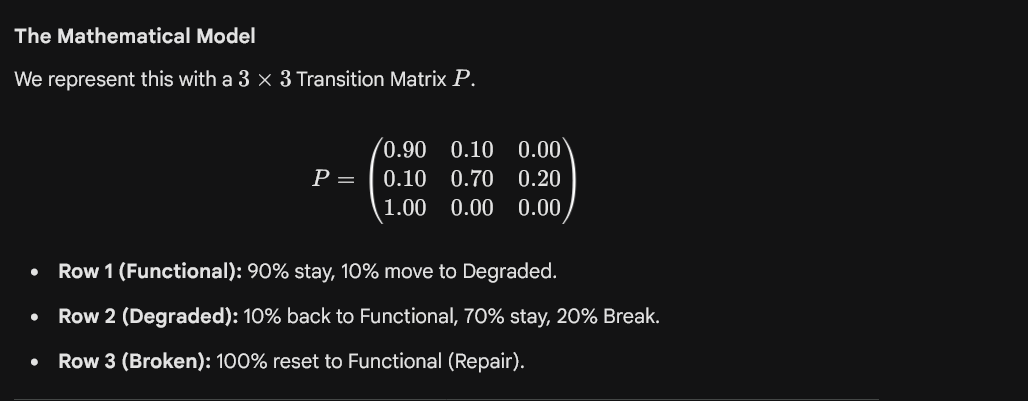

In [ ]:
import numpy as np

# Transition Matrix
# [Functional, Degraded, Broken]
P = np.array([
    [0.9, 0.1, 0.0],  # From Functional
    [0.1, 0.7, 0.2],  # From Degraded
    [1.0, 0.0, 0.0]   # From Broken (Instant Repair)
])

# Initial State: Machine is brand new (100% Functional)
state = np.array([1, 0, 0])

print("Production Line Forecast:")
print("-" * 30)

for day in range(1, 6):
    state = np.dot(state, P)
    print(f"Day {day}: {state[2]*100:>5.1f}% chance the line is DOWN (Broken)")

# Long-term availability
steady_state = np.linalg.matrix_power(P, 100)
availability = steady_state[0, 0] + steady_state[0, 1]
print("-" * 30)
print(f"Long-term Uptime (Functional + Degraded): {availability*100:.1f}%")

Why Factories Love This

    Risk Assessment: If the "Broken" probability on Day 5 is too high, the manager schedules maintenance on Day 4.

    Buffer Planning: If the long-term uptime is 92%, the factory knows they need to over-produce by 8% on "Good" days to meet their shipping quotas.

    Cost-Benefit: They can compare this matrix to a "New Machine" matrix to see if the $500,000 investment pays for itself in reduced downtime.

Would you like to see how we could add a "Maintenance" action to this code to see how it changes the breakdown probability?